# Introducción al Deep Learning: fundamentos, arquitecturas y aplicaciones
## David de la Rosa de la Rosa (drrosa@ujaen.es)
## Manuel Germán Morales (mgerman@ujaen.es)

### Redes Neuronales: Introducción a la Inteligencia Artificial y Aprendizaje Profundo

En este cuaderno aprenderemos cómo funciona el elemento básico de una red neuronal: la neurona artificial.

Analizaremos sus componentes, qué hace y cuáles son sus limitaciones.

Empezamos importando las librerías que utilizaremos en este notebook

In [2]:
# Imports
import csv
import numpy as np
from numpy import asarray, reshape
import matplotlib.pyplot as plt

Cargamos también algunas funciones útiles para cargar datos y visualizarlos

In [3]:
'''
Cargar dataset
'''
def load_data(filename):

    # Abrimos fichero
    with open(filename) as file:

        # Leemos el archivo y nos movemos sobre él
        reader = csv.reader(file)
        header = next(reader)
        data = []
        for row in reader:
            # Guardamos el dato en una EEDD
            data.append(row)
        data = asarray(data).astype(float)

    # Formateamos los datos y las etiquetas
    x = data[:, 0:-1]  # x representa los datos
    num_samples = data.shape[0]
    y = reshape(data[:, -1], (num_samples, 1))  # y representa las etiquetas
    return (x, y)


'''
Visualizar datos en 2D
'''
def plot_data_2d(x, y_gt):

    # Mostramos los datos (puntos en el espacio) y las etiquetas (color)
    plt.scatter(x[:, 0], x[:, 1], c=y_gt, s=50)

    # Damos formato al gráfico
    plt.colorbar()
    plt.axis("equal")
    plt.xlabel("x0", fontsize=16)
    plt.ylabel("x1", fontsize=16)
    plt.tick_params(axis="both", which="major", labelsize=16)
    plt.show()

def plot_pred_2d(x, y_gt, y_p, pesos=None, bias=0):

    # Mostramos los datos y las etiquetas reales y predichas
    plt.scatter(x[:, 0], x[:, 1], c=y_gt, s=50, label="ground truth")
    plt.scatter(x[:, 0], x[:, 1], c=y_p, s=100, marker="x", label="predicted")

    # Mostramos la línea que representa el peso de la neurona con bias
    if pesos is not None:
        w0, w1 = pesos[0], pesos[1]
        if w1 != 0:
            x_vals = np.array([x[:, 0].min(), x[:, 0].max()])
            y_vals = -(w0 / w1) * x_vals - (bias / w1)
            plt.plot(x_vals, y_vals, 'k--', label='decision boundary')
        else:
            x_val = -bias / w0 if w0 != 0 else 0
            plt.axvline(x_val, color='k', linestyle='--', label='decision boundary')

    # Damos formato al gráfico
    plt.legend(fontsize=12)
    plt.colorbar()
    plt.axis("equal")
    plt.xlabel("x0", fontsize=16)
    plt.ylabel("x1", fontsize=16)
    plt.tick_params(axis="both", which="major", labelsize=10)
    plt.show()

# Carga y visualización de datos

El primer paso en cualquier problema de ciencia de datos y, por ende, de IA, es la carga de datos y preprocesamiento.

En este caso vamos a utilizar un dataset "de juguete", por lo que no es necesario hacer un preprocesamiento (no hay datos corruptos, no hay valores perdidos, no hay valores anómalos,...)

In [4]:
# Cargar el dataset
(x, y_real) = load_data(filename="/content/datos_neurona.csv")


# Mostrar información relevante
print("--- Instancias ---")
print("Número de instancias: ", x.shape[0])
print(x)

print("\n--- Etiquetas ---")
print(y_real)

--- Instancias ---
Número de instancias:  20
[[ 1.13210319 -1.4066463 ]
 [-1.09042665  1.92715243]
 [-0.76551909 -0.14404298]
 [ 0.12162179 -0.78994452]
 [-0.47511814 -1.61110253]
 [ 0.22451311  0.54315986]
 [-0.2498135   0.0686202 ]
 [ 0.95858174  1.26612468]
 [ 1.94770422  0.88129908]
 [-0.23942295  0.49355215]
 [-0.86684561  0.32131904]
 [-0.23114367  1.44038263]
 [-0.40099583 -0.26931807]
 [ 1.35830369  0.1398443 ]
 [-1.50464579 -0.58452625]
 [ 0.15401177  1.41957166]
 [ 1.18233301 -0.05716118]
 [ 0.48304064 -1.01761707]
 [ 0.19611033 -2.0721155 ]
 [-0.54700911 -0.15378581]]

--- Etiquetas ---
[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]


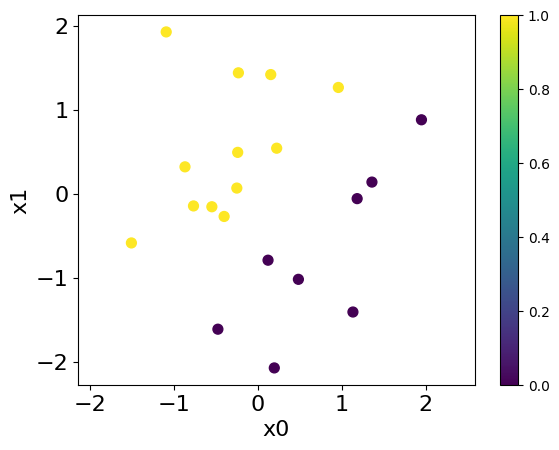

In [5]:
# Mostramos los datos
plot_data_2d(x, y_real)

En este caso, como se puede ver en el gráfico, la distribución de los datos es muy simple. El conjunto de datos está formado por 20 instancias bidimensionales.

Las instancias están repartidas en dos clases (0 morado, 1 amarillo)

# Construcción de una neurona

Una neurona, en su forma más simple, no es más que una operación sumatoria entre el valor de cada entrada de la neurona y el peso asociado a dicha entrada, junto a un término adicional llamado bias

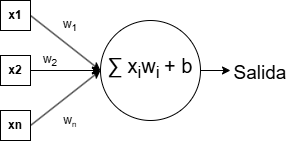

Es sospechosamente similar a la función de una línea recta...

$ y = mx + b$


... porque es lo mismo


Una neurona busca separar el espacio en dos partes con una figura geométrica lineal, que, en un espacio bidimensional como el que estamos trabajando, es una línea recta (en 3D sería un plano, en 4D...).

Expandiendo la operación de la neurona, obtenemos:
$w_0x_0 + w_1x_1 + b$

Cuando queremos usar una neurona para separar dos clases, la decisión se toma en función del signo de salida:

Si $valor_{neurona} > 0$ --> Clase A

Si $valor_{neurona} < 0$ --> Clase B

En el punto de frontera:

$w_0x_0 + w_1x_1 + b = 0$

Si convertimos $x_1$ en $y$ y $x_0$ en $x$:

$w_0x + w_1y + b = 0$

Despejando $y$: $y = - \frac{w_0}{w_1}x - \frac{b}{w_1}$

Que es la ecuación general de una línea recta donde la pendiente $m = - \frac{w_0}{w_1}$ y el término independiente $bias = \frac{b}{w_1}$

In [11]:
'''
Definición de una neurona.

- pesos: el peso que asigna la neurona a cada entrada. Como los datos de entrada tienen dos dimensiones, la neurona recibirá dos entradas, por lo tanto este será un vector de dos elementos
- bias: el bias de la neurona. Cada neurona tiene un único bias, así que es un valor flotante
- filas: las instancias que la neurona debe clasificar

'''


def neurona(pesos, bias, filas):

  resultados = []

  # Para cada instancia o fila de nuestro dataset...
  for fila in filas:

    total = 0

    # Calculamos la sumatoria
    for w, x in zip(pesos, fila):
      total += w * x

    total += bias

    # Si la sumatoria es positiva, devolvemos 1 (se activa la neurona), en otro caso, no se activa
    if total > 0:
      resultados.append(1)
    else:
      resultados.append(0)

  return resultados



# Importancia de un buen ajuste de pesos

La clave de las redes neuronales está en el ajuste de los pesos. Es la forma que tiene una red neuronal de *aprender*.

## Pesos aleatorios

Cuando los pesos son aleatorios, es decir, cuando la neurona no ha *aprendido* a procesar los datos, los resultados son completamente aleatorios...

In [7]:
from numpy.random import default_rng

rng = default_rng()

# w0 y w1 aleatorios
pesos_aleatorios = rng.standard_normal(size=(2,))

# bias aleatorio
bias_aleatorio = rng.standard_normal()
if bias_aleatorio > 0.5:
  bias_aleatorio = 0.5
elif bias_aleatorio < -0.5:
  bias_aleatorio = -0.5

In [10]:
salidas = neurona(pesos_aleatorios, bias_aleatorio, x)
print(salidas)

[-0.29461733 -1.054318  ]
-0.1755667595616247
[[ 1.13210319 -1.4066463 ]
 [-1.09042665  1.92715243]
 [-0.76551909 -0.14404298]
 [ 0.12162179 -0.78994452]
 [-0.47511814 -1.61110253]
 [ 0.22451311  0.54315986]
 [-0.2498135   0.0686202 ]
 [ 0.95858174  1.26612468]
 [ 1.94770422  0.88129908]
 [-0.23942295  0.49355215]
 [-0.86684561  0.32131904]
 [-0.23114367  1.44038263]
 [-0.40099583 -0.26931807]
 [ 1.35830369  0.1398443 ]
 [-1.50464579 -0.58452625]
 [ 0.15401177  1.41957166]
 [ 1.18233301 -0.05716118]
 [ 0.48304064 -1.01761707]
 [ 0.19611033 -2.0721155 ]
 [-0.54700911 -0.15378581]]
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]


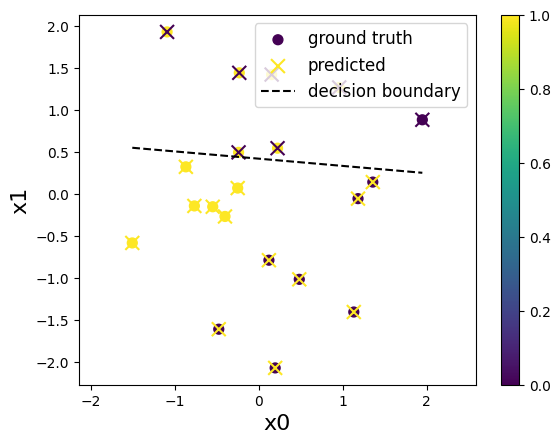

In [ ]:
plot_pred_2d(x, y_real, y_p=salidas, pesos=pesos_aleatorios, bias=bias_aleatorio)

## Pesos entrenados

... pero con un buen ajuste de los pesos, podemos lograr que la neurona resuelva problemas, que *aprenda* a hacer justo lo que el programador quiere


En cada iteración vamos a:

1. Coger una muestra
2. Buscar su etiqueta
3. Hacer que la neurona prediga la etiqueta de la muestra
4. Calcula el error (0 si está bien, 1 si está mal)
5. Actualizamos los pesos de la neurona en base al error
6. Actualizamos el bias de la neurona en base al error

In [ ]:

# Establecemos parámetros
num_samples = len(x)  # Número de filas o ejemplos
num_train_iterations = 100  # Número de iteraciones para entrenar
eta = 0.1  # Learning rate


# Inicializamos pesos de forma aleatoria
w = rng.standard_normal(size=(2,))
bias = rng.standard_normal()


# Para cada iteración del proceso de entrenamiento
for i in range(num_train_iterations):

    # 1. Seleccionamos una muestra aleatoria
    selected = rng.integers(0, num_samples)
    x_selected = x[selected]

    # 2. Buscamos su etiqueta
    y_gt_selected = y_real[selected]

    # 3. Hacemos que la neurona prediga esa muestra
    y_p_selected = neurona(w, bias, [x_selected])
    y_p_selected = np.array(y_p_selected).reshape(-1, 1)

    # 4. Calculamos el error. Si lo ha hecho bien, el error es 0
    error = y_p_selected - y_gt_selected

    # 5. Actualizamos los pesos en base al resultado (y el learning rate)
    w = w - eta * error * x_selected
    w = w.flatten()

    # 6. Actualizamos los pesos en base al resultado (y el learning rate)
    bias = bias - eta * error.item()


    print(i, w[0], w[1], bias, error[0])

0 0.831133589520619 0.887036568496665 0.06904463423353088 [0.]
1 0.831133589520619 0.887036568496665 0.06904463423353088 [0.]
2 0.831133589520619 0.887036568496665 0.06904463423353088 [0.]
3 0.7129002889391031 0.8927526867873917 -0.030955365766469123 [1.]
4 0.5946669883575871 0.8984688050781184 -0.13095536576646913 [1.]
5 0.5545674052804253 0.8715369981892691 -0.030955365766469123 [-1.]
6 0.5545674052804253 0.8715369981892691 -0.030955365766469123 [0.]
7 0.5545674052804253 0.8715369981892691 -0.030955365766469123 [0.]
8 0.5545674052804253 0.8715369981892691 -0.030955365766469123 [0.]
9 0.35979698295924045 0.7834070903700687 -0.13095536576646913 [1.]
10 0.2832450744171541 0.7690027927736668 -0.030955365766469123 [-1.]
11 0.2832450744171541 0.7690027927736668 -0.030955365766469123 [0.]
12 0.2832450744171541 0.7690027927736668 -0.030955365766469123 [0.]
13 0.22854416359982727 0.7536242116336742 0.06904463423353088 [-1.]
14 0.22854416359982727 0.7536242116336742 0.06904463423353088 [0.]
15

Es interesante cómo calculamos los pesos actualizados:



*   *w* es el valor del peso actual
*   *eta* es el learning rate. Permite controlar cuánto se ajustan los pesos en cada iteración
*   *error* es la diferencia entre la salida predicha y la salida real
*   *x_selected* es la muestra de entrada


Cada peso está asociado a una entrada específica, así que queremos ajustar cada peso proporcionalmente al valor de la entrada y al error que ha cometido.



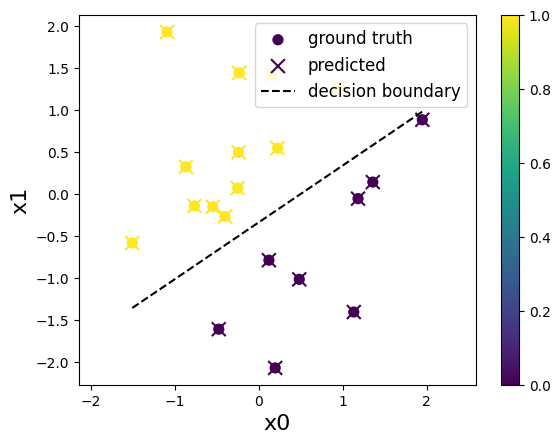

In [ ]:
plot_pred_2d(x, y_real, y_p=neurona(w, bias, x), pesos=w, bias=bias)

# Datos con mayor complejidad

Hasta ahora hemos visto que con una única neurona se puede separar el espacio en dos, pero surgen varios problemas.




*   Qué ocurre cuando se necesita clasificar en más de una clase? Una neurona es capaz de dividir el espacio en dos, no en N partes.

*   Qué ocurre cuándo el espacio de soluciones no es lineal? Una neurona es capaz de dividir el espacio con una figura geométrica lineal (como una recta). No puede dividir el espacio con figuras no lineales (curvas)



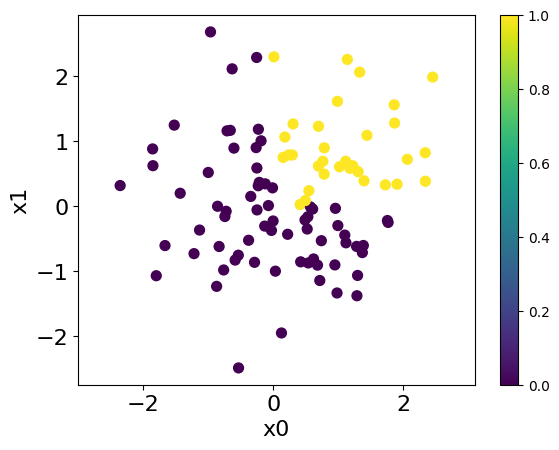

In [12]:
# Cargar el dataset
(x, y_real) = load_data(filename="/content/datos_neurona_complejo.csv")

# Mostramos los datos
plot_data_2d(x, y_real)


In [13]:
# Entrenamos la neurona
num_samples = len(x)  # Número de filas o ejemplos
num_train_iterations = 100  # Número de iteraciones para entrenar
eta = .1  # Learning rate


# Inicializamos pesos de forma aleatoria
w = rng.standard_normal(size=(2,))
bias = rng.standard_normal()


# Para cada iteración del proceso de entrenamiento
for i in range(num_train_iterations):

    # Seleccionamos una muestra aleatoria (y su etiqueta)
    selected = rng.integers(0, num_samples)
    x_selected = x[selected]
    y_gt_selected = y_real[selected]

    # Hacemos que la neurona prediga esa muestra
    y_p_selected = neurona(w, bias, [x_selected])
    y_p_selected = np.array(y_p_selected).reshape(-1, 1)

    # Calculamos el error. Si lo ha hecho bien, el error es 0
    error = y_p_selected - y_gt_selected

    # Actualizamos los pesos en base al resultado (y el learning rate)
    w = w - eta * error * x_selected
    w = w.flatten()

    bias = bias - eta * error.item()


    print(i, w[0], w[1], bias, error[0])

0 -0.4687661534548107 -0.6415313682019637 -0.8720372658983556 [-1.]
1 -0.4687661534548107 -0.6415313682019637 -0.8720372658983556 [0.]
2 -0.34645506048441177 -0.5790696627859665 -0.7720372658983556 [-1.]
3 -0.34645506048441177 -0.5790696627859665 -0.7720372658983556 [0.]
4 -0.34645506048441177 -0.5790696627859665 -0.7720372658983556 [0.]
5 -0.16633518873558714 -0.47234033829180666 -0.8720372658983556 [1.]
6 -0.16633518873558714 -0.47234033829180666 -0.8720372658983556 [0.]
7 -0.16633518873558714 -0.47234033829180666 -0.8720372658983556 [0.]
8 -0.16633518873558714 -0.47234033829180666 -0.8720372658983556 [0.]
9 0.006105087237149559 -0.4392281685872005 -0.7720372658983556 [-1.]
10 0.1284161802075485 -0.37676646317120327 -0.6720372658983557 [-1.]
11 0.11583657049068469 -0.18193152479166394 -0.7720372658983556 [1.]
12 0.11583657049068469 -0.18193152479166394 -0.7720372658983556 [0.]
13 0.11678094713330676 0.04816689292037171 -0.6720372658983557 [-1.]
14 0.2609114842618844 0.157410502871426

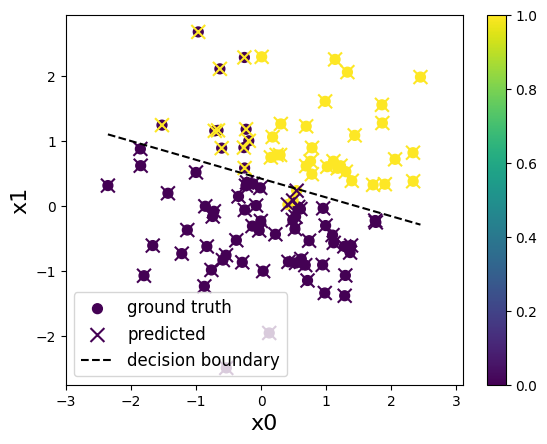

In [ ]:
plot_pred_2d(x, y_real, y_p=neurona(w, bias, x), pesos=w, bias=bias)

En este punto entran en juego dos elementos clave: la apilación de neuronas y el uso de funciones de activación no lineales.

## Apilación de neuronas (red neuronal)

Se analiza más a fondo en la siguiente sesión del curso, pero en general permite dividir el espacio en figuras más complejas que una simple linea recta.

Cada neurona hace la operación de sumatoria de pesos y bias a partir de su entrada.



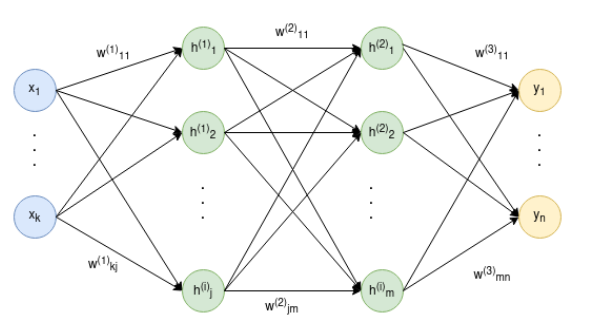

**PROBLEMA**: la composición de funciones lineales da como resultado otra función lineal.

Por más neuronas que añadamos a nuestra red, si no introducimos elementos no lineales, la separación del espacio seguirá siendo lineal, por lo que tendremos el mismo problema.

# Funciones de activación

La solución radica en las llamadas funciones de activación. Hasta ahora hemos visto que la neurona sigue la ecuación:

$Output = ∑w_i x_i + b $

Pero en realidad, a esta salida se le aplica una *función de activación* no lineal

$Output = F(∑w_i x_i + b) $



Esta función de activación introduce la no linealidad que necesita un modelo de red neuronal para adaptarse a cualquier problema al que se enfrente.

Contamos con múltiples funciones de activación diferentes:

## Función de activacion sigmoide

Devuelve una probabilidad entre 0 y 1 para cada neurona, por lo que es útil para problemas de clasificación (una neurona asociada a cada clase).

Tiene el problema de saturación del gradiente. Aunque se profundizará en la siguiente sesión, se necesita calcular la derivada de la función para actualizar los pesos de la red en el entrenamiento. Esta función, la derivada en los extremos es muy cercana a cero, por lo que si la neurona recibe valores muy altos o muy bajos apenas se van a actualizar los pesos de la red.

No se suele utilizar en capas ocultas porque es computacionalmente más costosa que otras funciones, pero es útil en la última capa del modelo.

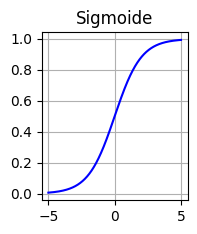

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de entrada
x = np.linspace(-5, 5, 1000)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoide
plt.subplot(2, 3, 2)
plt.plot(x, sigmoid(x), label='Sigmoid', color='blue')
plt.title("Sigmoide")
plt.grid(True)

## Función de activación tangencial

Aporta salida entre -1 y 1. Se solía utilizar mucho en capas intermedias de la red neuronal antes de que aparecieran otras opciones más eficientes.

Tiene el mismo problema de saturación de gradiente que la sigmoide en los extremos.

También es más costosa que otras para usarla en capas intermedias.

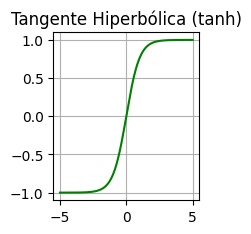

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de entrada
x = np.linspace(-5, 5, 1000)

def tanh(x):
    return np.tanh(x)

# Tanh
plt.subplot(2, 3, 3)
plt.plot(x, tanh(x), label='Tanh', color='green')
plt.title("Tangente Hiperbólica (tanh)")
plt.grid(True)

## Función ReLU

Devuelve salida entre 0 e infinito. Es la más utilizada en la actualidad en las capas intermedias de la red neuronal.

Evita el problema de saturación de gradiente, ya que la neurona para $x>0$ es 1.

Es eficiente computacionalmente hablando, lo que la convierte en una buena alternativa a tangencial o sigmoide para capas intermedias.

Tiene el problema que para $x<0$ su salida siempre es 0 "matando" neuronas si se reciben muchas entradas con esas características.


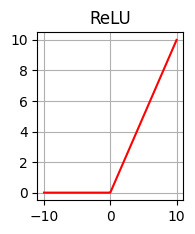

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de entrada
x = np.linspace(-10, 10, 1000)

def relu(x):
    return np.maximum(0, x)

# ReLU
plt.subplot(2, 3, 4)
plt.plot(x, relu(x), label='ReLU', color='red')
plt.title("ReLU")
plt.grid(True)

## Función Leaky ReLU

Variante de ReLU en la que la salida se devuelve entre -infinito e infinito (siguiendo la forma del gráfico). Se puede usar en capas intermedias de la red si ReLU no aporta buenos resultados.

Muy parecida a ReLU, solo que para $x<0$ la salida va decreciendo gradualmente, evitando la "matanza" de neuronas.

Es algo más costosa computacionalmente hablando.

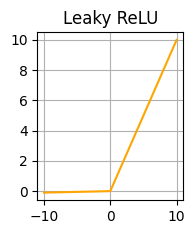

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de entrada
x = np.linspace(-10, 10, 1000)

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

# Leaky ReLU
plt.subplot(2, 3, 5)
plt.plot(x, leaky_relu(x), label='Leaky ReLU', color='orange')
plt.title("Leaky ReLU")
plt.grid(True)

# Frameworks para el desarrollo DL

Al introducir las funciones de activación y la apilación de neuronas, la programación manual de una red neuronal se vuelve muy costosa. Por suerte, han aparecido múltiples librerías para el desarrollo de redes neuronales profundas que facilitan enormemente el trabajo de desarrolladores, como Pytorch o Keras.

En este curso nos centraremos en Pytorch y Pytorch lightning.

Con un código tan sencillo como este, acabamos de definir una red neuronal con múltiples neuronas y capas

In [ ]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 975.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 55.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlin

In [ ]:
# Cargar el dataset
(x, y_real) = load_data(filename="/content/datos_neurona.csv")

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Convertir a tensores
X_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y_real, dtype=torch.float32).view(-1, 1)  # forma (N, 1)

# Separar en train
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

# Modelo Lightning
class NeuronaBinaria(pl.LightningModule):
    def __init__(self, input_dim):
        super().__init__()

        self.red = nn.Sequential(
            nn.Linear(input_dim, 1),  # 1 neurona en la capa oculta
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.red(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.binary_cross_entropy(y_hat, y)
        acc = ((y_hat > 0.5) == y).float().mean()
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=0.1)

# Entrenar
input_dim = x.shape[1]
model = NeuronaBinaria(input_dim)
trainer = pl.Trainer(max_epochs=100)
trainer.fit(model, train_loader)

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type       | Params | Mode 
--------------------------------------------
0 | red  | Sequential | 3      | train
--------------------------------------------
3         Trainable params
0         Non-trainable params
3         Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [ ]:
import torch
import torch.nn as nn
import pytorch_lightning as pl

class MLP(pl.LightningModule):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.input_size = 2  # Dimensiones de las instancias de entrada a la red
        self.hidden_size = 4  # Número de neuronas en la capa oculta
        self.num_classes = 1  # Número de clases en las que queremos clasificar las instancias

        # Definimos la red neuronal
        self.red = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_size),  # Capa oculta (4 neuronas)
            nn.ReLU(),  # Función de activación ReLU
            nn.Linear(self.hidden_size, self.num_classes),  # Capa de salida (1 neuronas)
            nn.Sigmoid(),
        )